## Carga de base de datos
Anuncios de inmuebles de alquiler turístico en las principales plataformas.

#### Importación de bibliotecas

In [7]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
# Definir la paleta institucional (colocarla en una celda anterior si es necesario)
paleta = [
    "#1B3C59", "#3A5A40", "#8BAAAD", "#D9D9D9", 
    "#E8F1F2", "#A67C52", "#F4A261", "#264653", 
    "#A8DADC", "#457B9D", "#E63946", "#F4E285", 
    "#2A9D8F", "#6D597A", "#B5838D"
]


#### Conexión a MySQL

In [9]:
def get_database(host, user, password, database):
    try:
        cnx = mysql.connector.connect(
            host = host,
            user = user,
            password = password,
            database = database
        )

        if cnx.is_connected():
            print(f'Se conectó a la base de datos "{database}" en MySQL')

        cursor = cnx.cursor()
        cursor.execute('SHOW TABLES;')
        
        tables = cursor.fetchall()
        table_names = [table[0] for table in tables]

        print(f'Tablas encontradas: {table_names}.')

        db = {}

        for table in table_names:
            query = f'SELECT * FROM {table};'
            db[table] = pd.read_sql(query, con = cnx) 
        return db

    except mysql.connector.Error as error:
        print(f'Error: {error}')
        return None

    finally:
        if cnx.is_connected():
            cnx.close()
            print('Conexión a MySQL cerrada.')


def rename_dfs():
    for table, df in db.items():
        globals()[table] = df
        print(f'Se creó el dataframe "{table}"')

if __name__ == '__main__':
    host = '212.227.90.6'
    user = 'EquipoE'
    password = 'E1q2u3i4p5oE'
    database = 'Equip_E'

    db = get_database(host, user, password, database)
    rename_dfs()


Se conectó a la base de datos "Equip_E" en MySQL
Tablas encontradas: ['Tourist_Accommodation', 'Tourist_Accommodation10032025', 'Tourist_Accommodation17032025', 'Tourist_Accommodation25032025'].


C:\Users\Evelyn\AppData\Local\Temp\ipykernel_9860\1596814766.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db[table] = pd.read_sql(query, con = cnx)


Conexión a MySQL cerrada.
Se creó el dataframe "Tourist_Accommodation"
Se creó el dataframe "Tourist_Accommodation10032025"
Se creó el dataframe "Tourist_Accommodation17032025"
Se creó el dataframe "Tourist_Accommodation25032025"


## Exploración inicial

In [10]:
# se carga como df la TABLA MÁS RECIENTE
df = Tourist_Accommodation25032025
pd.set_option('display.max_columns', None) # ver todas las columnas
df.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2,1,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,VERDADERO,7,20,40,130,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,31/07/2018
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1,1,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,VERDADERO,0,0,0,162,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,10/01/2020
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,VERDADERO,26,31,31,270,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,29/07/2019
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,1.0,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,VERDADERO,9,23,49,300,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,10/01/2020
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1,2,5.0,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,1,180,VERDADERO,0,19,49,312,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,19/02/2019


### Tamaño

In [11]:
df.shape

(21000, 35)

### Tipos de datos

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 21000 non-null  int64  
 1   name                         20995 non-null  object 
 2   description                  20708 non-null  object 
 3   host_id                      21000 non-null  int64  
 4   neighbourhood_name           21000 non-null  object 
 5   neighbourhood_district       12778 non-null  object 
 6   room_type                    21000 non-null  object 
 7   accommodates                 21000 non-null  int64  
 8   bathrooms                    20829 non-null  object 
 9   bedrooms                     20857 non-null  object 
 10  beds                         20914 non-null  float64
 11  amenities_list               20962 non-null  object 
 12  price                        20479 non-null  float64
 13  minimum_nights  

#### Corrección de tipos de datos

In [13]:
# conversión a numérico
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')

# conversión a booleano
df['has_availability'] = df['has_availability'].replace({'VERDADERO': True}).fillna(False)
df['has_availability'] = df['has_availability'].astype(bool)

df['is_instant_bookable'] = df['is_instant_bookable'].replace({'VERDADERO': True, 'FALSO': False})
df['is_instant_bookable'] = df['is_instant_bookable'].astype(bool)

# conversión a fechas
df["first_review_date"] = pd.to_datetime(df["first_review_date"], errors="coerce")
df["last_review_date"] = pd.to_datetime(df["last_review_date"], errors="coerce")
df["insert_date"] = pd.to_datetime(df["insert_date"], errors="coerce")

df.info()

C:\Users\Evelyn\AppData\Local\Temp\ipykernel_9860\3580156214.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_availability'] = df['has_availability'].replace({'VERDADERO': True}).fillna(False)
C:\Users\Evelyn\AppData\Local\Temp\ipykernel_9860\3580156214.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_instant_bookable'] = df['is_instant_bookable'].replace({'VERDADERO': True, 'FALSO': False})
C:\Users\Evelyn\AppData\Local\Temp\ipykernel_9860\3580156214.py:15: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=Fals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 21000 non-null  int64         
 1   name                         20995 non-null  object        
 2   description                  20708 non-null  object        
 3   host_id                      21000 non-null  int64         
 4   neighbourhood_name           21000 non-null  object        
 5   neighbourhood_district       12778 non-null  object        
 6   room_type                    21000 non-null  object        
 7   accommodates                 21000 non-null  int64         
 8   bathrooms                    20829 non-null  float64       
 9   bedrooms                     20857 non-null  float64       
 10  beds                         20914 non-null  float64       
 11  amenities_list               20962 non-nu

### Duplicados

In [14]:
df.duplicated().sum()

np.int64(8000)

In [15]:
registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 21000
Total de duplicados exactos: 8000
El número de apartment_id duplicados es: 8350


### Análisis estadísticos y outliers


 Distribución Variables Numéricas:

                               Media  Desviación estándar  Mínimo  Q1 (25%)  Mediana  Q3 (75%)   Máximo
accommodates                    4.27                 2.58     1.0       2.0      4.0      6.00     29.0
bathrooms                       1.60                 1.00     0.0       1.0      1.0      2.00     13.0
bedrooms                        1.94                 1.36     0.0       1.0      2.0      3.00     50.0
beds                            2.92                 2.26     0.0       1.0      2.0      4.00     30.0
price                        1020.13               984.93    60.0     450.0    750.0   1240.00  28571.0
minimum_nights                  4.92                18.36     1.0       1.0      2.0      4.00   1125.0
maximum_nights                758.36               498.77     1.0      60.0   1125.0   1125.00   1125.0
availability_30                12.95                11.81     0.0       0.0     11.0     26.00     30.0
availability_60            

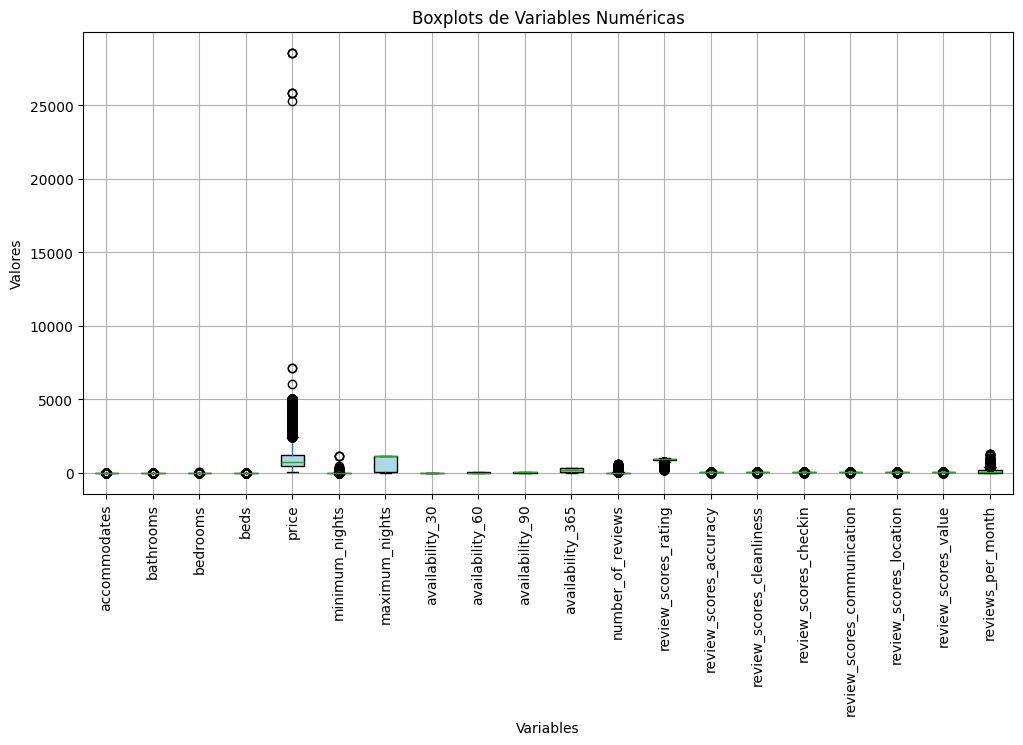

In [16]:
# Filtrar solo variables numéricas
df_numericas = df.select_dtypes(include=[np.number]).drop(columns=['apartment_id', 'host_id'],errors = 'ignore')

# Calcular estadísticas básicas
estadisticas = df_numericas.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estadisticas.columns = ['Media', 'Desviación estándar', 'Mínimo', 'Q1 (25%)', 'Mediana', 'Q3 (75%)', 'Máximo']

# Redondear a dos decimales
estadisticas = estadisticas.round(2)

# Mostrar estadísticas
print("\n Distribución Variables Numéricas:\n")
print(estadisticas.to_string())

# Crear boxplots de todas las variables numéricas
plt.figure(figsize=(12, 6))
df_numericas.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplots de Variables Numéricas")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

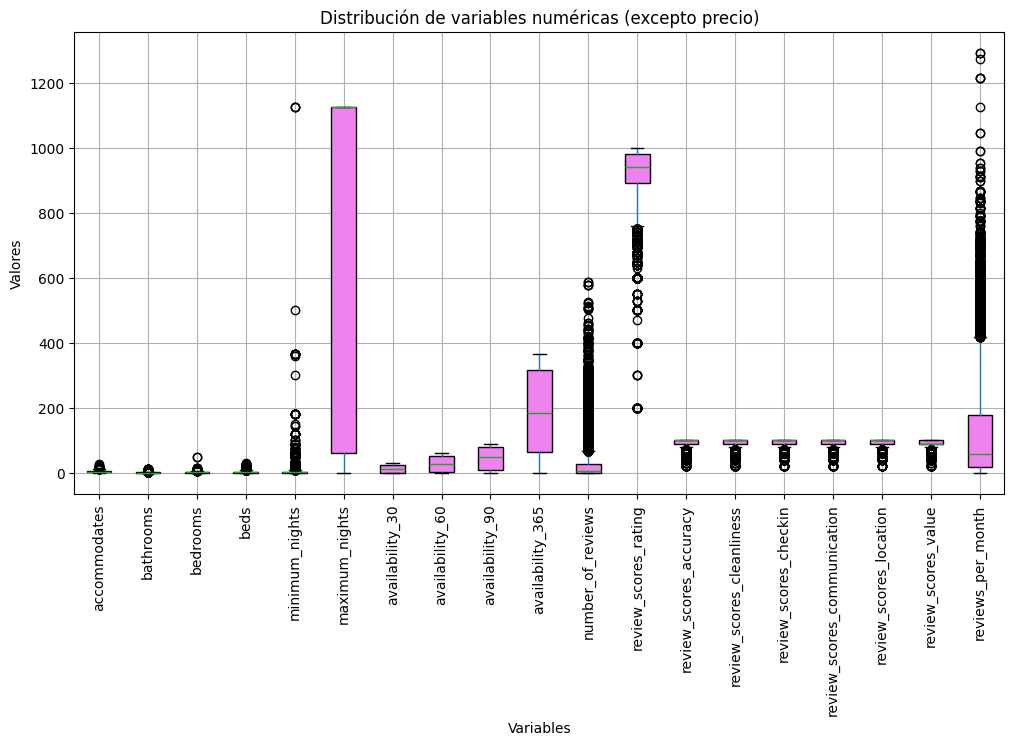

In [17]:
# nuevo gráfico sin precio vara visualizar mejor las demás variables

df_no_price = df_numericas.drop('price', axis=1)
plt.figure(figsize=(12, 6))
df_no_price.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="violet"))
plt.title("Distribución de variables numéricas (excepto precio)")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

## Limpieza de datos (Data Cleaning)

### Tratamiento de duplicados

In [18]:
registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 21000
Total de duplicados exactos: 8000
El número de apartment_id duplicados es: 8350


In [19]:
# Filtar las filas con apartment_id duplicados
duplicados_filas = df[df['apartment_id'].duplicated(keep=False)]

# Mostrar las filas duplicadas
duplicados_filas.head(10)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2.0,1.0,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,True,7,20,40,130,78,2010-02-01,2017-05-09,970.0,100.0,100.0,100.0,100.0,100.0,100.0,False,75.0,spain,malaga,2018-07-31
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.0,1.0,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,True,0,0,0,162,33,2014-10-10,NaT,920.0,90.0,90.0,100.0,100.0,80.0,90.0,False,52.0,spain,madrid,2020-01-10
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,2.0,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,True,26,31,31,270,148,2011-05-01,NaT,980.0,100.0,100.0,100.0,100.0,100.0,100.0,True,142.0,spain,sevilla,2019-07-29
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.0,1.0,1.0,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,True,9,23,49,300,292,NaT,2020-04-01,940.0,100.0,90.0,100.0,100.0,100.0,90.0,True,306.0,spain,barcelona,2020-01-10
9,73683,Sagrada Familia area for 12 people,"An ideal location for a big group, two apartme...",135703,el Camp d'en Grassot i Gr�cia Nova,Gr�cia,Entire home/apt,12,2.0,4.0,14.0,"TV,Cable TV,Internet,Wifi,Air conditioning,Kit...",3000.0,2,60,True,8,12,23,296,120,2011-04-06,NaT,920.0,90.0,90.0,100.0,100.0,90.0,90.0,True,14.0,spain,barcelona,2018-06-09
11,79755,3Br-2bath-AC Full 5 stars reviews!,"90 m2 apartment, 2 baths, 3 bedrooms. Fully eq...",429939,l'Antiga Esquerra de l'Eixample,Eixample,Entire home/apt,5,2.0,3.0,4.0,"TV,Internet,Wireless Internet,Air conditioning...",1100.0,3,365,True,9,10,10,10,189,NaT,2016-01-10,980.0,100.0,100.0,100.0,100.0,100.0,100.0,True,234.0,spain,barcelona,2017-12-09
13,89776,Modernist flat Downtown Casa Estap� | Barcelona,"Unique and rare ! Stay in the Casa Estap�, jew...",488151,el Fort Pienc,Eixample,Entire home/apt,4,1.0,1.0,2.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Elev...",650.0,3,365,True,7,18,41,224,322,2011-10-11,2019-01-12,960.0,100.0,100.0,100.0,100.0,100.0,100.0,True,327.0,spain,barcelona,2019-12-10
14,89954,Amazing apt in the historic center,"Beautiful, new, central and cosy apartment per...",487095,Palacio,Centro,Entire home/apt,6,1.0,2.0,3.0,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Elev...",1030.0,2,20,True,27,48,49,61,181,2011-01-07,2018-01-11,970.0,100.0,100.0,100.0,100.0,100.0,100.0,False,202.0,spain,madrid,2018-11-07
17,103386,"Central 2 Bedrooms, 3/5 pers. Wi-Fi","This is Edificio Palomar Apartments, I will tr...",508042,EL PILAR,CIUTAT VELLA,Entire home/apt,5,1.0,2.0,3.0,"TV,Wifi,Air conditioning,Kitchen,Paid parking ...",840.0,1,14,True,17,38,64,229,13,2011-01-11,NaT,930.0,100.0,100.0,100.0,90.0,90.0,100.0,False,13.0,spain,valencia,2019-10-31
18,107437,A beautiful villa in Barcelona,"A conserved, period villa situated in the mids...",556626,"Vallvidrera, el Tibidabo i les Planes",Sarri�-Sant Gervasi,Entire home/apt,8,2.0,5.0,6.0,"TV,Wifi,Kitchen,Free parking on premises,Smoki...",2200.0,3,120,True,12,41,59,250,34,2011-08-07,NaT,930.0,100.0,100.0,100.0,100.0,100.0,90.0,True,38.0,spain,barcelona,2018-10-10


Se decidió borrar solo los duplicados exactos y mantener los parciales (que son duplicados de la columna apartment_id) para que cada perfil decida cómo los tratará en su análisis.

In [20]:
df = df.drop_duplicates()

### Valores nulos

In [21]:
df.isnull().sum()

apartment_id                      0
name                              4
description                     173
host_id                           0
neighbourhood_name                0
neighbourhood_district         5084
room_type                         0
accommodates                      0
bathrooms                       111
bedrooms                         85
beds                             60
amenities_list                   23
price                           327
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              9000
last_review_date               9000
review_scores_rating           3536
review_scores_accuracy         3549
review_scores_cleanliness      3540
review_scores_checkin          3557
review_scores_communication 

#### Eliminación de columnas irrelevantes

In [22]:
df = df.drop(columns=['description', 'country'])

#### Función de imputación de nulos

In [23]:
def imputación_desde_duplicados(df, id_col, date_col):
    """
    Conserva el duplicado más antiguo y completa sus valores faltantes 
    con los del más reciente SIN eliminar registros.
    Devuelve el df con valores actualizados y un resumen de los cambios.
    """

    df = df.copy()  # no modifica el df original
    resumen = []

    # filtra solo duplicadas por id_col
    grupos_duplicados = df[df.duplicated(subset=[id_col], keep=False)]

    for value, group in grupos_duplicados.groupby(id_col):
        if len(group) > 1:
            # ordena (más antiguo primero)
            group = group.sort_values(by=date_col, ascending=True)
            earliest_index = group.index[0]
            latest_index = group.index[1]

            # completa valores faltantes en el registro antiguo
            actualizacion = {}
            for col in df.columns:
                if pd.isna(df.at[earliest_index, col]) and not pd.isna(df.at[latest_index, col]):
                    df.at[earliest_index, col] = df.at[latest_index, col]
                    actualizacion[col] = df.at[latest_index, col]

            # si hubo cambios, se guarda en el resumen
            if actualizacion:
                resumen.append({
                    "ID": value,
                    "índice del registro antiguo": earliest_index,
                    "índice del registro reciente": latest_index,
                    "columnas actualizadas": actualizacion
                })

    # convierte el resumen en df
    resumen_df = pd.DataFrame(resumen)

    return df, resumen_df

df, resumen_cambios = imputación_desde_duplicados(df, id_col='apartment_id', date_col='insert_date')

#### Reviews_per_month

In [24]:
df_nulos = df[df['reviews_per_month'].isna()]
df_nulos[['reviews_per_month','number_of_reviews']].tail(10)

,reviews_per_month,number_of_reviews
20955,NaN,0
20960,NaN,0
20969,NaN,0
20974,NaN,0
20976,NaN,0
20987,NaN,0
20988,NaN,0
20989,NaN,0
20990,NaN,0
20993,NaN,0


Se observa que la mayoría de los valores nulos en reviews_per_month están justificados, ya que corresponden a alojamientos que no han recibido ninguna reseña.

#### Reviews

In [25]:
# Averiguar si hay algún valor nulo con reseña
print((df_nulos['number_of_reviews'] > 0).any())

True


In [26]:
# Crear tabla de aquellos nulos con reseñas
df_nulos_filtrados = df_nulos[df_nulos['number_of_reviews'] > 0]
df_nulos_filtrados[['name', 'number_of_reviews', 'reviews_per_month']]

,name,number_of_reviews,reviews_per_month
4985,Club Villamar - Gomez,1,NaN
5213,Single room luminous Sagrada Familia WIFI new ...,1,NaN
6393,Habitacion para disfrutar un descanso conforta...,1,NaN
20615,Habitacion para disfrutar un descanso conforta...,1,NaN


Existen 3 alojamientos que tienen 1 review, pero presentan valores nulos en reviews_per_month.

In [27]:
# Analisis del resto de columnas de reviews

# Seleccionar solo las columnas de interés
cols_reviews = [
    'first_review_date', 'last_review_date', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value'
]

# Filtrar filas donde TODAS las columnas están nulas
df_todas_nulas = df[df[cols_reviews].isnull().all(axis=1)]

# Filtrar filas donde ALGUNA columna está nula, pero no todas
df_parcialmente_nulas = df[df[cols_reviews].isnull().any(axis=1) & ~df[cols_reviews].isnull().all(axis=1)]

# Mostrar el número de filas en cada caso
print(f"Filas con nulos en TODAS las columnas: {len(df_todas_nulas)}")
print(f"Filas con nulos en ALGUNAS columnas, pero no en todas: {len(df_parcialmente_nulas)}")

Filas con nulos en TODAS las columnas: 3449
Filas con nulos en ALGUNAS columnas, pero no en todas: 7661


In [28]:
# Verificar si todas las filas en df_todas_nulas tienen number_of_reviews == 0
todas_nulas_son_cero = (df_todas_nulas['number_of_reviews'] == 0).all()

print(f"¿Todas las filas con valores nulos en 'cols_reviews' tienen 'number_of_reviews' igual a 0?: {todas_nulas_son_cero}")

¿Todas las filas con valores nulos en 'cols_reviews' tienen 'number_of_reviews' igual a 0?: False


#### Neighbourhood_district

In [29]:
# Imputación de valores nulos en 'neighbourhood_district' utilizando la moda de 'neighbourhood_name' filtrando por 'city'.

df['neighbourhood_district'] = df.groupby(['city', 'neighbourhood_name'])['neighbourhood_district'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Desconocido")
)

#### Características numéricas del alojamiento
Se sustituyen los nulos por 1, bajo el entendido de que en todos los alojamientos por defecto hay 1 cama, 1 baño y aloja a al menos a 1 persona.

In [30]:
df[['beds', 'bathrooms', 'bedrooms']] = df[['accommodates', 'bathrooms', 'bedrooms']].fillna(1)

#### Precio

In [31]:
# Reemplazar los nulos en 'price' con la mediana del 'price' según 'room_type'
df['price'] = df.groupby('room_type')['price'].transform(lambda x: x.fillna(x.median()))

#### Columnas de texto

In [32]:
df["name"].fillna("Desconocido", inplace=True)
df['amenities_list'] = df['amenities_list'].fillna("Sin información")

C:\Users\Evelyn\AppData\Local\Temp\ipykernel_9860\1815731930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["name"].fillna("Desconocido", inplace=True)


#### Verificación

In [33]:
df.isnull().sum()

apartment_id                      0
name                              0
host_id                           0
neighbourhood_name                0
neighbourhood_district            0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities_list                    0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              8986
last_review_date               8957
review_scores_rating           3512
review_scores_accuracy         3525
review_scores_cleanliness      3516
review_scores_checkin          3533
review_scores_communication    3520
review_scores_location      

El df resultante tiene únicamente nulos en las variables relativas a las reseñas, lo cual es esperable, ya que no todos los avisos tendrán reseñas.

# Análisis de la variable precio

### Histograma con KDE: Para ver la distribución general de los precios.
### Boxplot: Para visualizar la dispersión y los posibles outliers.

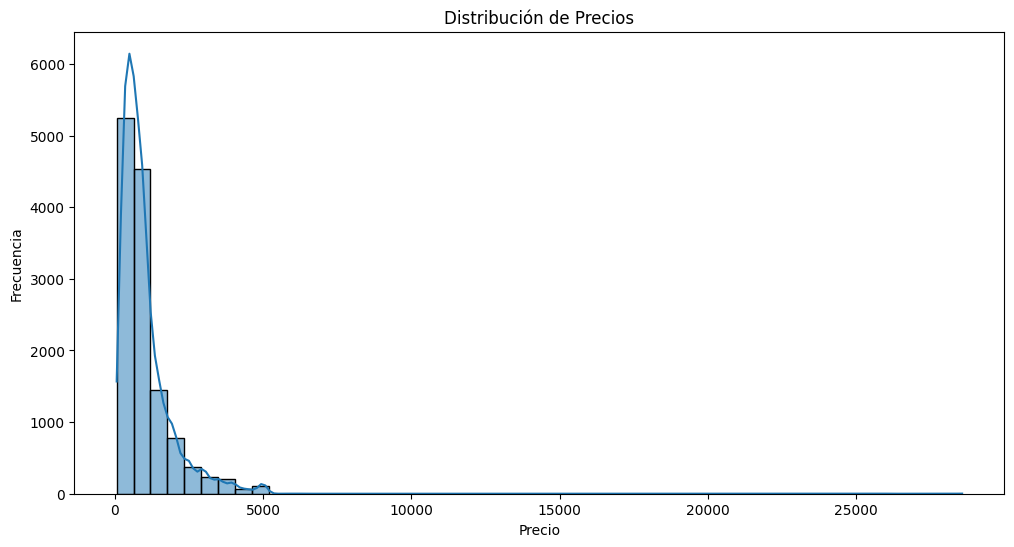

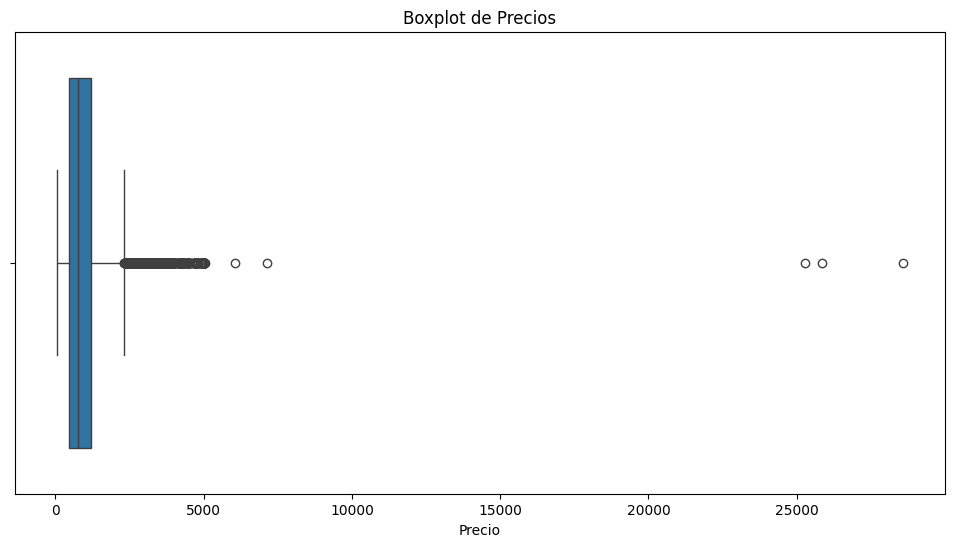

In [34]:
# Histograma con KDE para ver la distribución de precios
plt.figure(figsize=(12, 6))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot para ver outliers y dispersión
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["price"])
plt.title("Boxplot de Precios")
plt.xlabel("Precio")
plt.show()

In [35]:
df["price"].describe()


count    13000.000000
mean      1009.666000
std        930.179685
min         60.000000
25%        450.000000
50%        750.000000
75%       1200.000000
max      28571.000000
Name: price, dtype: float64

Intervalos fijos

In [36]:
df["price"].value_counts(bins=10).sort_index()


(31.488, 2911.1]      12389
(2911.1, 5762.2]        606
(5762.2, 8613.3]          2
(8613.3, 11464.4]         0
(11464.4, 14315.5]        0
(14315.5, 17166.6]        0
(17166.6, 20017.7]        0
(20017.7, 22868.8]        0
(22868.8, 25719.9]        1
(25719.9, 28571.0]        2
Name: count, dtype: int64

Análisis de la distribución
Concentración en precios bajos:

El 75% de los precios está por debajo de 1200.
La media está en 1017, pero la mediana es 750, lo que confirma una asimetría positiva (cola a la derecha).
Hay valores extremos muy altos (máximo de 28,571).
El 95% de los datos (9,505 de 10,000) están en el primer intervalo (31.5 - 2911.1), lo que significa que la mayoría de los valores están en el rango bajo.

## Cómo armar categorías correctamente (enfoque experto)

Cuando definimos categorías para una variable numérica como el precio, debemos considerar los cuatro criterios clave (exclusividad, exhaustividad, relevancia y equilibrio) y aplicar un enfoque estructurado.

1️⃣ Analizar la distribución de los datos
Antes de categorizar, debemos entender cómo están distribuidos los precios. Como mencionaste antes, los datos están concentrados en precios bajos y tienen una cola larga hacia precios altos, lo que indica que la distribución es sesgada a la derecha.

2️⃣ Elegir un método de categorización
Hay varios métodos para definir categorías:

✅ Cuartiles: Divide en partes iguales según la cantidad de datos.

✅ Intervalos fijos: Usa cortes predefinidos (ej. "0-1000", "1001-5000").

✅ Logaritmo / percentiles ajustados: Separa mejor los valores extremos.

Dado que los precios altos son muy raros, los cuartiles ayudaron bastante, pero no son suficientes. Para mejorar aún más, usaremos percentiles ajustados, asegurando que haya suficientes datos en cada grupo.

3️⃣ Definir cortes basados en percentiles
En lugar de usar cuartiles simples, vamos a revisar los percentiles más altos para mejorar la distribución. Usaremos:
📌 P20 (20% de los datos más baratos)
📌 P40, P60, P80 (segmentación equilibrada)
📌 P99 (para capturar valores muy altos sin que haya categorías con casi cero datos)

In [37]:
import numpy as np

# Calculamos los percentiles clave
percentiles = np.percentile(df["price"], [20, 40, 60, 80, 99])
bins = [df["price"].min()] + list(percentiles) + [df["price"].max()]

# Definimos etiquetas
labels = ["Económico", "Accesible", "Medio", "Alto", "Premium", "Exclusivo"]

# Aplicamos la categorización
df["price_category"] = pd.cut(df["price"], bins=bins, labels=labels, right=True)

# Revisamos la nueva distribución
print(df["price_category"].value_counts())


price_category
Económico    2876
Medio        2622
Alto         2571
Premium      2470
Accesible    2330
Exclusivo     130
Name: count, dtype: int64


Explicación criterio utilizado

1️⃣ ¿Por qué usamos percentiles y no valores fijos?
→ Porque los datos no están distribuidos uniformemente, y así logramos que cada categoría tenga una cantidad razonable de datos.

2️⃣ ¿Por qué incluimos el percentil 99 en lugar de solo el 100?
→ Para evitar que la última categoría tenga casi ningún dato, ya que el máximo suele ser un outlier extremo.

3️⃣ ¿Qué mejora logramos con este método?

✅ Equilibrio: Cada categoría tendrá un número más parejo de datos.

✅ Relevancia: Evitamos categorías inútiles con muy pocos registros.

✅ Exclusividad y exhaustividad: Cada dato cae en una sola categoría sin quedar fuera.

Agregar la categoría al df original

In [38]:
df["price_category"] = pd.cut(df["price"], bins=bins, labels=labels, right=True)


In [39]:
df.groupby("price_category")["price"].describe()


C:\Users\Evelyn\AppData\Local\Temp\ipykernel_9860\3865989673.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("price_category")["price"].describe()


,count,mean,std,min,25%,50%,75%,max
price_category,,,,,,,,
Económico,2876.0,285.855355,81.146557,80.0,230.0,300.0,350.0,400.0
Accesible,2330.0,522.884120,60.484727,410.0,480.0,510.0,590.0,620.0
Medio,2622.0,766.678108,84.732598,630.0,700.0,750.0,840.0,920.0
Alto,2571.0,1110.046674,143.037361,930.0,990.0,1090.0,1200.0,1410.0
Premium,2470.0,2234.759919,727.813146,1420.0,1650.0,2000.0,2600.0,4420.0
Exclusivo,130.0,5393.392308,3288.070107,4450.0,4750.0,5000.0,5000.0,28571.0


## Transformación de Datos (Data Transformation)

## Reducción de Datos (Data Reduction)

## Exportación del dataset limpio

In [40]:
print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 21000
Total de duplicados exactos: 0
El número de apartment_id duplicados es: 8350


In [ ]:
df.to_csv("../Data/tourist_accommodation_clean.csv", index=False)